In [1]:
import pandas as pd
import numpy as np

In [2]:
#Import OK Cupid Profiles
df = pd.read_csv("profiles.csv")

In [3]:
#Look at Data
print(df.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

In [4]:
#Drop NA lines
new_df = df.dropna()

In [5]:
print(new_df.columns)
print(len(df))


Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
59946


In [6]:
#Look at status and other potential features
print(new_df["status"].value_counts())

single            4093
available          159
seeing someone     135
married             20
Name: status, dtype: int64


<AxesSubplot:>

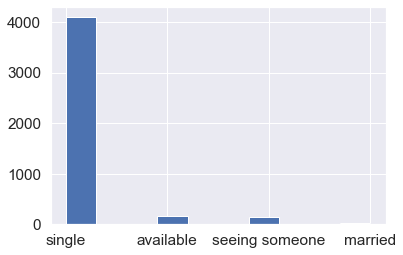

In [51]:
new_df["status"].hist()

In [7]:
print(new_df["sex"].value_counts())

m    2470
f    1937
Name: sex, dtype: int64


In [8]:
print(new_df["drugs"].value_counts())

never        3423
sometimes     916
often          68
Name: drugs, dtype: int64


In [9]:
print(new_df["drinks"].value_counts())

socially       2958
rarely          581
often           396
not at all      386
very often       52
desperately      34
Name: drinks, dtype: int64


In [10]:
print(new_df["education"].value_counts())

graduated from college/university    1739
graduated from masters program        699
working on college/university         572
graduated from two-year college       184
graduated from high school            170
working on two-year college           132
working on masters program            128
dropped out of college/university     120
graduated from ph.d program           100
graduated from law school              91
dropped out of space camp              71
graduated from space camp              64
working on ph.d program                62
working on space camp                  48
college/university                     47
graduated from med school              37
dropped out of two-year college        21
working on law school                  20
dropped out of masters program         18
working on med school                  16
two-year college                       16
dropped out of high school             15
working on high school                 12
dropped out of ph.d program       

In [11]:
print(new_df["pets"].value_counts())

likes dogs and likes cats          1726
likes dogs                          591
likes dogs and has cats             518
has dogs                            359
has dogs and likes cats             323
likes dogs and dislikes cats        269
has dogs and has cats               202
has cats                            122
likes cats                          104
has dogs and dislikes cats           86
dislikes dogs and likes cats         51
dislikes dogs and dislikes cats      30
dislikes dogs and has cats           12
dislikes cats                        10
dislikes dogs                         4
Name: pets, dtype: int64


In [12]:
print(new_df["income"].value_counts())

-1          2983
 20000       461
 100000      167
 40000       131
 30000       129
 80000       112
 50000       109
 60000        87
 70000        79
 150000       67
 1000000      58
 250000       16
 500000        8
Name: income, dtype: int64


In [13]:
print(new_df["religion"].value_counts())

agnosticism but not too serious about it      346
other and laughing about it                   302
agnosticism and laughing about it             295
atheism and laughing about it                 272
christianity but not too serious about it     267
catholicism but not too serious about it      249
other but not too serious about it            247
other                                         231
agnosticism                                   216
atheism but not too serious about it          150
atheism                                       145
judaism but not too serious about it          143
christianity                                  136
other and somewhat serious about it           131
christianity and somewhat serious about it    131
atheism and somewhat serious about it         128
catholicism and laughing about it              98
atheism and very serious about it              86
buddhism but not too serious about it          84
agnosticism and somewhat serious about it      78


In [34]:
#Changed Text to Integers for Certain Columns
new_dictionary = {"status": {"single":0, "available":0, "seeing someone":1, "married":1}, 
                 "drinks": {"socially":1, "rarely":1, "not at all":0, "often":2, "very often":2, "desperately":2},
                 "drugs": {"never":0, "sometimes":1, "often":2},
                 "orientation": {"straight":0, "bisexual":1, "gay":2},
                  "sex":{"m":0, "f":1},
                  "education":{"graduated from med school":8,"working on med school":8, "graduated from ph.d program":8, "working on ph.d program":8, "graduated from law school":7,"working on law school":7,"dropped out of ph.d program":6,"dropped out of law school":6,"space camp":5, "graduated from space camp":5, "working on space camp":5, "dropped out of space camp":4,"graduated from masters program":6,"masters program":6,"working on masters program":6,"dropped out of masters program":5, "graduated from college/university":5,"college/university":5, "graduated from two-year college":4, "working on college/university":5,"working on two-year college":4, "dropped out of two-year college":3,"two-year college":4, "dropped out of college/university":3, "graduated from high school":2,"high school":2,"working on high school":1, "dropped out of high school":0},
                  "pets":{"likes dogs and likes cats":2,"likes dogs":2,"likes dogs and has cats":3,"has dogs":3,"has dogs and likes cats":3,"likes dogs and dislikes cats":2,"has dogs and has cats":3,"has cats":2,"likes cats":1,"has dogs and dislikes cats":1,"dislikes dogs and likes cats":1,"dislikes dogs and dislikes cats":0,"dislikes dogs and has cats":1,"dislikes cats":0,"dislikes dogs":0},
                  "religion":{"agnosticism but not too serious about it":1,"other and laughing about it":2,"agnosticism and laughing about it":1,"atheism and laughing about it":1,"christianity but not too serious about it":3,"catholicism but not too serious about it":3,"other but not too serious about it":3,"other":14,"agnosticism":1,"atheism but not too serious about it":1,"atheism":0,"judaism but not too serious about it":3,"christianity":4,"other and somewhat serious about it":14,"christianity and somewhat serious about it":4,"atheism and somewhat serious about it":0,"catholicism and laughing about it":2,"atheism and very serious about it":0,"buddhism but not too serious about it":2,"agnosticism and somewhat serious about it":0,"other and very serious about it":14,"catholicism and somewhat serious about it":8,"christianity and very serious about it":8,"buddhism and somewhat serious about it":12,"judaism and laughing about it":2,"buddhism and laughing about it":2,"catholicism":4,"agnosticism and very serious about it":0,"christianity and laughing about it":2,"judaism and somewhat serious about it":6,"judaism":6,"buddhism":12,"catholicism and very serious about it":8,"hinduism and somewhat serious about it":5,"hinduism but not too serious about it":2,"buddhism and very serious about it":13,"islam but not too serious about it":2,"hinduism":5,"islam and somewhat serious about it":7,"judaism and very serious about it":10,"hinduism and very serious about it":9,"islam and very serious about it":11,"hinduism and laughing about it":2,"islam and laughing about it":2,"islam":7}}   
new_dff = new_df.replace(new_dictionary)


In [35]:
print(new_dff.head())

    age       body_type               diet  drinks  drugs  education  \
0    22  a little extra  strictly anything       1      0          5   
19   33        athletic    mostly anything       1      0          6   
22   30             fit    mostly anything       1      0          5   
94   29             fit    mostly anything       1      1          5   
98   31           curvy           anything       1      1          6   

                                               essay0  \
0   about me:<br />\n<br />\ni would love to think...   
19  i relocated to san francisco half a year ago. ...   
22  i tend to think the same way a comedian does a...   
94  my names josh, and i create art for a living. ...   
98  one day i will mod r/hotchickswithspreadsheets...   

                                               essay1  \
0   currently working as an international agent fo...   
19  i left my comfort zone far behind in europe, a...   
22  i'm a supply and demand manager for a sustaina...

In [36]:
#nothings is particularly correlated although drugs/age slight negative correlation, education/age slight positive, religion/age slight positive, education/age slight positive
new_dff.corr()

,age,drinks,drugs,education,height,income,orientation,pets,religion,sex,status
age,1.000000,-0.097076,-0.185742,0.155052,-0.036197,-0.022141,-0.075100,0.079212,0.143312,0.068393,-0.063314
drinks,-0.097076,1.000000,0.251011,-0.007772,0.017571,0.063713,-0.013425,-0.016363,-0.107732,-0.011546,0.004512
drugs,-0.185742,0.251011,1.000000,-0.130634,0.084907,0.093680,0.054317,-0.015040,-0.069198,-0.078713,0.018700
education,0.155052,-0.007772,-0.130634,1.000000,-0.045846,-0.021982,-0.025445,-0.047003,0.010760,0.086295,-0.012525
height,-0.036197,0.017571,0.084907,-0.045846,1.000000,0.077560,-0.012090,-0.067694,-0.067960,-0.659509,-0.028495
income,-0.022141,0.063713,0.093680,-0.021982,0.077560,1.000000,-0.025924,-0.025563,0.005760,-0.097393,0.002990
orientation,-0.075100,-0.013425,0.054317,-0.025445,-0.012090,-0.025924,1.000000,-0.023016,0.030281,0.018184,0.044229
pets,0.079212,-0.016363,-0.015040,-0.047003,-0.067694,-0.025563,-0.023016,1.000000,0.024845,0.120549,0.024069
religion,0.143312,-0.107732,-0.069198,0.010760,-0.067960,0.005760,0.030281,0.024845,1.000000,0.117517,-0.034199
sex,0.068393,-0.011546,-0.078713,0.086295,-0.659509,-0.097393,0.018184,0.120549,0.117517,1.000000,0.036912


In [37]:
#without gender
data = new_dff[["education","income","age", "drinks", "status", "drugs", "orientation", "pets", "religion"]]
from sklearn.preprocessing import scale
scaled_data = scale(data, axis = 0)
print(scaled_data[0])

[-0.07100006 -0.26029306 -1.04611322 -0.04914322 -0.19092782 -0.51772983
 -0.36813204 -0.40264869 -0.86183687]


In [38]:
#labels gender 60% of the time
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
labels = new_dff[["sex"]]
data = scaled_data
training_data, validation_data, training_labels, validation_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2, random_state = 1)
forest = RandomForestClassifier(random_state = 1)
forest.fit(training_data, np.ravel(training_labels,order='C'))
print(forest.score(validation_data, validation_labels))

0.6111111111111112


In [39]:
#without income
data = new_dff[["education","sex","age", "drinks", "status", "drugs", "orientation", "pets", "religion"]]
from sklearn.preprocessing import scale
scaled_data = scale(data, axis = 0)
print(scaled_data[0])

[-0.07100006 -0.88555662 -1.04611322 -0.04914322 -0.19092782 -0.51772983
 -0.36813204 -0.40264869 -0.86183687]


In [40]:
#labels income 59% of the time
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
labels = new_dff[["income"]]
data = scaled_data
training_data, validation_data, training_labels, validation_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2, random_state = 1)
forest = RandomForestClassifier(random_state = 1)
forest.fit(training_data, np.ravel(training_labels,order='C'))
print(forest.score(validation_data, validation_labels))

0.5941043083900227


In [41]:
#without drinks
data = new_dff[["education","sex","age", "income", "status", "drugs", "orientation", "pets", "religion"]]
from sklearn.preprocessing import scale
scaled_data = scale(data, axis = 0)
print(scaled_data[0])

[-0.07100006 -0.88555662 -1.04611322 -0.26029306 -0.19092782 -0.51772983
 -0.36813204 -0.40264869 -0.86183687]


In [42]:
#labels level of drinking 78% of the time
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
labels = new_dff[["drinks"]]
data = scaled_data
training_data, validation_data, training_labels, validation_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2, random_state = 1)
forest = RandomForestClassifier(random_state = 1)
forest.fit(training_data, np.ravel(training_labels,order='C'))
print(forest.score(validation_data, validation_labels))

0.7834467120181405


In [43]:
#without drugs
data = new_dff[["education","sex","age", "income", "status", "drinks", "orientation", "pets", "religion"]]
from sklearn.preprocessing import scale
scaled_data = scale(data, axis = 0)
print(scaled_data[0])

[-0.07100006 -0.88555662 -1.04611322 -0.26029306 -0.19092782 -0.04914322
 -0.36813204 -0.40264869 -0.86183687]


In [44]:
#labels level of drug use %76 of the time
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
labels = new_dff[["drugs"]]
data = scaled_data
training_data, validation_data, training_labels, validation_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2, random_state = 1)
forest = RandomForestClassifier(random_state = 1)
forest.fit(training_data, np.ravel(training_labels,order='C'))
print(forest.score(validation_data, validation_labels))

0.7619047619047619


In [45]:
#without relationship status
data = new_dff[["education","sex","age", "income", "drugs", "drinks", "orientation", "pets", "religion"]]
from sklearn.preprocessing import scale
scaled_data = scale(data, axis = 0)
print(scaled_data[0])

[-0.07100006 -0.88555662 -1.04611322 -0.26029306 -0.51772983 -0.04914322
 -0.36813204 -0.40264869 -0.86183687]


In [57]:
#labels relationship status 96% of the time, but they are mostly single
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
labels = new_dff[["status"]]
data = scaled_data
training_data, validation_data, training_labels, validation_labels = train_test_split(data, labels, train_size = 0.7, test_size = 0.3, random_state = 1)
forest = RandomForestClassifier(random_state = 1)
forest.fit(training_data, np.ravel(training_labels,order='C'))
print(forest.score(validation_data, validation_labels))

0.9501133786848073


In [58]:
# Make predictions for the test set
y_pred_test = forest.predict(validation_data)

In [59]:
#small dtataset, doesn't work for married so changed married to 1 as well
print(y_pred_test)

[0 0 0 ... 0 0 0]


In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(validation_labels, y_pred_test)

array([[1256,    7],
       [  59,    1]], dtype=int64)

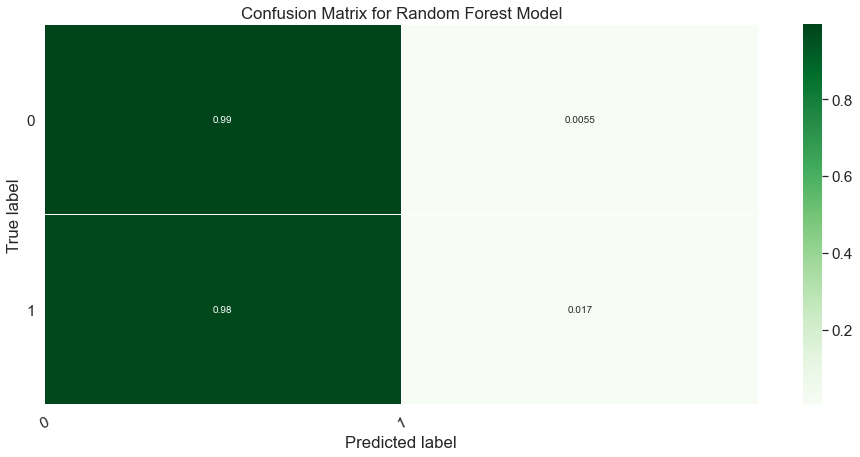

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
# Get and reshape confusion matrix data
matrix = confusion_matrix(validation_labels, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = [0,1]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
#There are not enough 1s to make this work well. The score is high because there are so many singles.